Analysis for forest fires in Brazil
In Brazil forest fires is a complex problem to solve. With the data provided we can perform analysis to check which areas are heavily 
affected by the fires.  What causes the fires, during which seasons are the fires frequent.

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Reading the csv file

In [272]:
data = pd.read_csv('amazon.csv', encoding='iso-8859-1')

Check the first few rows

In [273]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


Check the columns and information

In [274]:
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


Translating the months from portugues to english.

In [275]:
#printing out the unique months in portuguese 
print(data.loc[: ,"month"].unique())

['Janeiro' 'Fevereiro' 'Março' 'Abril' 'Maio' 'Junho' 'Julho' 'Agosto'
 'Setembro' 'Outubro' 'Novembro' 'Dezembro']


In [276]:
#create a dictitonary to translate months from   Protuguese to english
month_Translating= {'Janeiro':"January", 'Fevereiro':'February', 'Março':'March','Abril':'April','Maio':"May",'Junho':'June', 'Julho':'July', 'Agosto':'August',
'Setembro': 'September', 'Outubro':'October','Novembro':'November', 'Dezembro':'December' }

#Replacing the portuguese with english in the column

data["month_english"]= data['month'].map(month_Translating)

#Checking the new data set with the new months changed to english
print(data['month_english'].unique())

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


Drop the moth with portugues and use the one with english

In [277]:
data.drop(columns="month")

,year,state,number,date,month_english
0,1998,Acre,0.0,1998-01-01,January
1,1999,Acre,0.0,1999-01-01,January
2,2000,Acre,0.0,2000-01-01,January
3,2001,Acre,0.0,2001-01-01,January
4,2002,Acre,0.0,2002-01-01,January
...,...,...,...,...,...
6449,2012,Tocantins,128.0,2012-01-01,December
6450,2013,Tocantins,85.0,2013-01-01,December
6451,2014,Tocantins,223.0,2014-01-01,December
6452,2015,Tocantins,373.0,2015-01-01,December


Check for missing values 

In [278]:
data.isnull().any()

year             False
state            False
month            False
number           False
date             False
month_english    False
dtype: bool

Trend analysis to show fire analysis over the years

C:\Users\brian\AppData\Local\Temp\ipykernel_20120\250327083.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


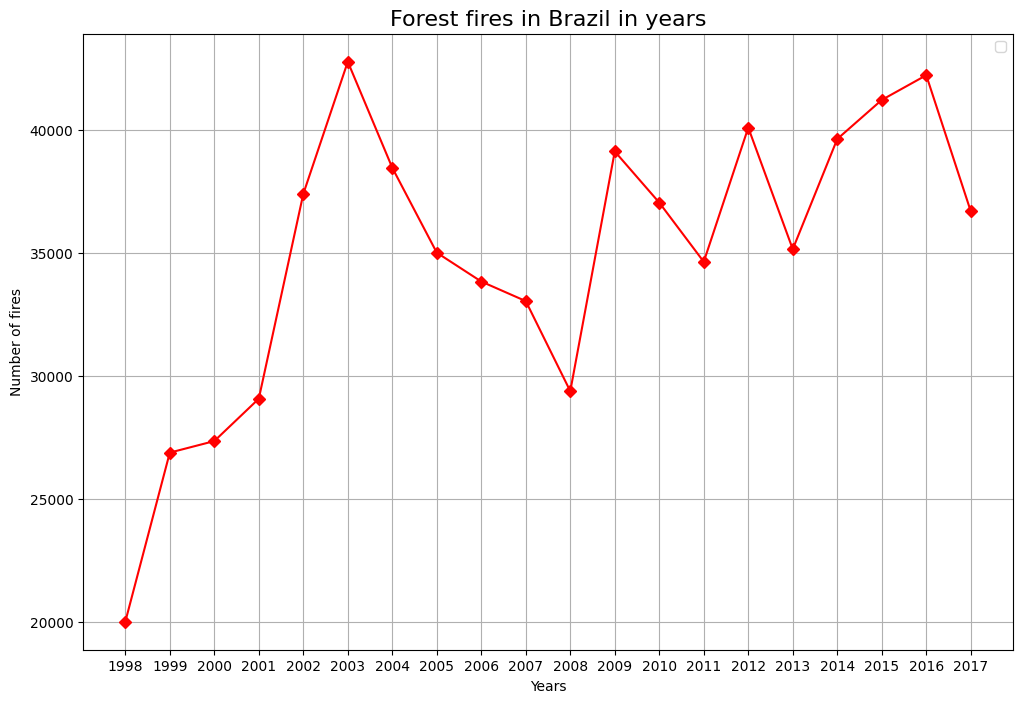

In [279]:
years = data.groupby('year')["number"].sum()

plt.figure(figsize=(12,8))
plt.plot(years.index, years, marker='D', color= "red")
plt.title("Forest fires in Brazil in years", fontsize= 16)
plt.legend()
plt.xlabel('Years')
plt.ylabel('Number of fires')

# fix the x axis to show the columns 
plt.xticks(ticks=years.index, labels=years.index.astype(int) )

#use of grid to make it easly visible 
plt.grid(True)
plt.show()


Which months over the years was largely affected

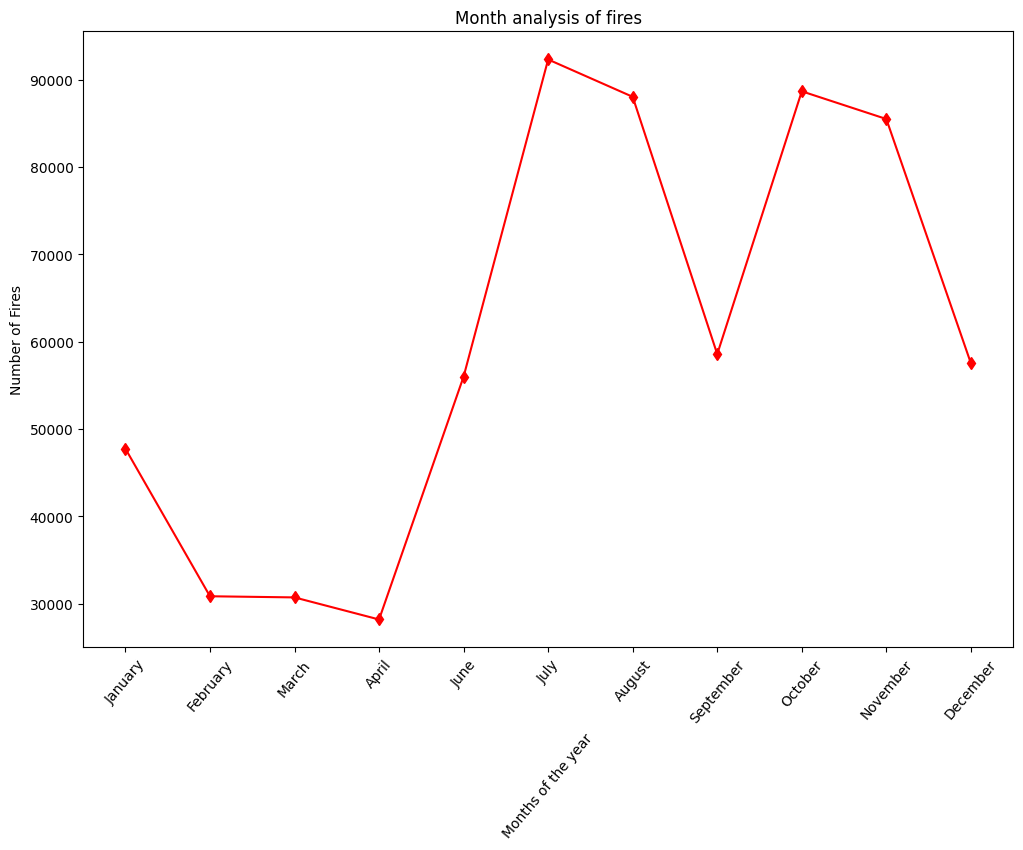

In [280]:
#Finding the totla figures of fires per month over the years
months_data= data.groupby("month_english")["number"].sum()

month_order = ["January","February","March","April","June","July","August","September","October","November","December"]
months_data= months_data.reindex(month_order)

plt.figure(figsize=(12,8))
plt.plot(months_data.index, months_data, marker= 'd',color= "red" )
plt.title("Month analysis of fires")
plt.ylabel("Number of Fires")
plt.xlabel("Months of the year" , rotation= 50)
plt.xticks(rotation = 50)

plt.show()


Geographic distribution 
Analysing which Brazil state encounters more fire.

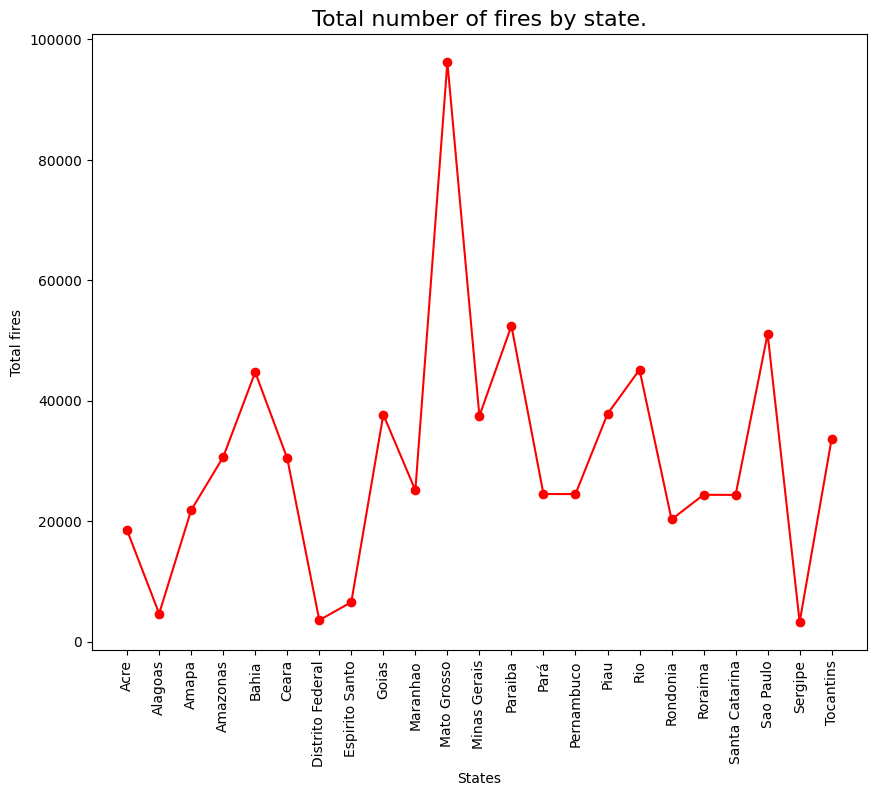

In [281]:
#Grouping by state to find the sum of fires encountered
state_number = data.groupby("state")["number"].sum()

plt.figure(figsize=(10,8))
plt.plot(state_number.index, state_number, marker = 'o',color= "red")
plt.title("Total number of fires by state.", fontsize= 16)
plt.xlabel('States')
plt.ylabel('Total fires')
plt.xticks(ticks=state_number.index, labels=state_number.index, rotation = 90)
plt.show()